# __Data Processing__

Different from original paper, in our reproduction attemp we will use data collected before the Brazilian presidential ellection in 2022.

The two terms used as search query to extract tweets were:

    1. #BolsonaroReeleito
    2. O LULA TÁ ELEITO
    
Both terms extracted in the same date, November 22nd, 2022.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
data_path = '../data/tweets/'

bols_df = pd.read_csv(data_path+'2022-11-22-#BolsonaroReeleito.csv')
lula_df = pd.read_csv(data_path+'2022-11-22-O LULA TÁ ELEITO.csv')

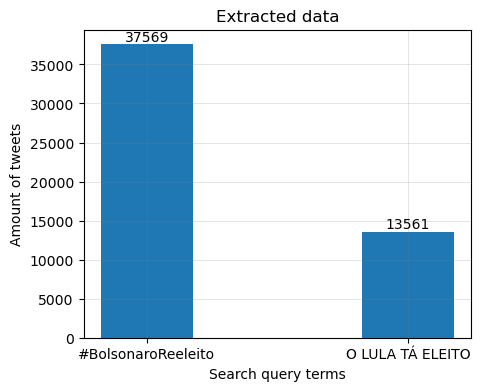

In [3]:
fig, ax = plt.subplots(figsize=(5,4))
ax.grid(True,
        color='grey',
        linestyle='-',
        linewidth=0.5,
        alpha=0.3,)
plt.bar(
    ['#BolsonaroReeleito', 'O LULA TÁ ELEITO'],
    [bols_df.shape[0], lula_df.shape[0]],
    width=0.35)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Search query terms')
plt.ylabel('Amount of tweets')
plt.title('Extracted data')
plt.show()

In [4]:
bols_df.drop('Unnamed: 0', axis=1, inplace=True)
lula_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
bols_df.sample(5)

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags
29511,2022-11-22 22:00:57,1595175529023475720,#BolsonaroReeleito\nMeu presidente!!!! Estamos...,IvairSouza4,"{'id': 1025747061076094976, 'name': 'Ivair Sou...",False,NaN,False,NaN,False,NaN,True,"{'user': 'goncalves273', 'user_id': 3234219783...",['#BolsonaroReeleito']
24360,2022-11-22 22:34:13,1595183898719305728,Sigam @E_PaKabah ! SDV todos!\n\nEsse dia cheg...,binyfim,"{'id': 1242107942, 'name': '🇧🇷Deny🇧🇷', 'descri...",True,"[{'id': '419803861', 'username': 'E_PaKabah'}]",False,NaN,False,NaN,True,"{'user': 'E_PaKabah', 'user_id': 419803861, 't...",['#BolsonaroReeleito']
595,2022-11-23 02:43:17,1595246579908284416,"É preciso esclarecer, o relatório do PL, basea...",Dantuzum,"{'id': 724723418, 'name': 'Dantuzum', 'descrip...",False,NaN,False,NaN,False,NaN,True,"{'user': 'MauricioCostaRS', 'user_id': 3286919...",['#BolsonaroReeleito']
2313,2022-11-23 02:11:59,1595238702392942593,@Estadao @estadaoverifica A BOA e VELHA IMPREN...,antonio_saless,"{'id': 2651913488, 'name': 'Matheus Salles', '...",True,"[{'id': '9317502', 'username': 'Estadao'}, {'i...",True,"{'user': 'Estadao', 'user_id': 9317502, 'tweet...",False,NaN,False,NaN,"['#BolsonaroTemRazao', '#BolsonaroReeleito', '..."
34077,2022-11-22 21:22:17,1595165798225825792,Essa eleição foi fraudada. #BolsonaroReeleito ...,maranataoravemJ,"{'id': 2491738122, 'name': 'Leila Jesus vem.',...",False,NaN,False,NaN,False,NaN,True,"{'user': 'Suzano_info', 'user_id': 15057842073...",['#BolsonaroReeleito']


In [6]:
lula_df.sample(5)

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags
9728,2022-11-22 22:27:23,1595182179340128257,@euailze JANONES REPRESENTA O POVO.\nBOLSONARO...,Dan_SK,"{'id': 19292996, 'name': 'Ciclista com PFF2', ...",True,"[{'id': '414788942', 'username': 'euailze'}]",True,"{'user': 'euailze', 'user_id': 414788942, 'twe...",False,NaN,False,NaN,NaN
13175,2022-11-22 19:59:13,1595144894376398848,@UOLNoticias O LULA TÁ ELEITO\nO LULA TÁ ELEIT...,gleyseviana_,"{'id': 1376374120942821378, 'name': 'LA DEMOCR...",True,"[{'id': '14594698', 'username': 'UOLNoticias'}]",True,"{'user': 'UOLNoticias', 'user_id': 14594698, '...",False,NaN,False,NaN,NaN
336,2022-11-23 02:33:40,1595244158859546625,"Chora mais, BOLSONARO 51 IMÓVEIS. \nO LULA TÁ ...",MarilisMolinari,"{'id': 1351294424807051277, 'name': 'Marilís M...",False,NaN,False,NaN,False,NaN,True,"{'user': '_Janoninho', 'user_id': 156389790744...",NaN
10977,2022-11-22 22:05:01,1595176552559702016,@_Janoninho O LULA TÁ ELEITO,_filhadasaguas_,"{'id': 3025187523, 'name': 'Carvalhão', 'descr...",True,"[{'id': '1563897907446747136', 'username': '_J...",True,"{'user': '_Janoninho', 'user_id': 156389790744...",False,NaN,False,NaN,NaN
612,2022-11-23 02:16:46,1595239908003676160,O LULA TÁ ELEITO! https://t.co/BVOK35vXaK,Patricia_Paes10,"{'id': 3007214188, 'name': 'Patrícia', 'descri...",False,NaN,False,NaN,False,NaN,True,"{'user': 'nandatorres21', 'user_id': 24684107,...",NaN


### Data Filtering

The original work uses only native tweets and retweets. Our data contains quoted tweets, that we will exclude.

In [7]:
old_amount = (bols_df.shape[0], lula_df.shape[0])

bols_df = bols_df[bols_df['is_quote']==False]
lula_df = lula_df[lula_df['is_quote']==False]

plot_df = pd.DataFrame(data={'old_amount': [old_amount[0], old_amount[1]],
                             'current_amount': [bols_df.shape[0], lula_df.shape[0]]},
                       index=['#BolsonaroReeleito', 'O LULA TÁ ELEITO'])

In [8]:
plot_df

,old_amount,current_amount
#BolsonaroReeleito,37569,36870
O LULA TÁ ELEITO,13561,12871


In order to decrease the data sparsity, we consider only users with at least 5 retweets or 3 composed tweets, and tweets with the minimum number of 5 retweets.

In [9]:
# retweets
bolso_rts = bols_df.query('is_retweet == True')
lula_rts = lula_df.query('is_retweet == True')

bolso_comp = bols_df.query('is_retweet == False')
lula_comp = lula_df.query('is_retweet == False')

print(f'''
Bolsonaro data:
Retweets: {bolso_rts.shape[0]}
Composed tweets: {bolso_comp.shape[0]}

Lula data:
Retweets: {lula_rts.shape[0]}
Composed tweets: {lula_comp.shape[0]}
''')


Bolsonaro data:
Retweets: 32253
Composed tweets: 4617

Lula data:
Retweets: 9180
Composed tweets: 3691



In [10]:
# users with 3 o more composed tweets
users_comp = {}

users_comp['bolso_data'] = [user for user,tweets_amount in list(zip(bolso_comp['user'].value_counts().index, bolso_comp['user'].value_counts())) if tweets_amount >= 3]
users_comp['lula_data'] = [user for user,tweets_amount in list(zip(lula_comp['user'].value_counts().index, lula_comp['user'].value_counts())) if tweets_amount >= 3]

print(f'''
Number of users with 3 or more composed tweets
Bolsonaro data: {len(users_comp['bolso_data'])}
Lula data: {len(users_comp['lula_data'])}
''')


Number of users with 3 or more composed tweets
Bolsonaro data: 278
Lula data: 163



In [11]:
# users with 5 or more retweets

users_rts = {}

users_rts['bolso_data'] = [user for user,rts_amount in list(zip(bolso_rts['user'].value_counts().index, bolso_rts['user'].value_counts())) if rts_amount >= 5]
users_rts['lula_data'] = [user for user,rts_amount in list(zip(lula_rts['user'].value_counts().index, lula_rts['user'].value_counts())) if rts_amount >= 5]

print(f'''
Number of users with 5 or more retweets
Bolsonaro data: {len(users_rts['bolso_data'])}
Lula data: {len(users_rts['lula_data'])}
''')


Number of users with 5 or more retweets
Bolsonaro data: 1012
Lula data: 331



In [12]:
# not excluded users

not_excluded = {}

not_excluded['bolso_data'] = list(set(users_comp['bolso_data']+users_rts['bolso_data']))
not_excluded['lula_data'] = list(set(users_comp['lula_data']+users_rts['lula_data']))

print(f'''
Not excluded users
Bolsonaro data: {len(not_excluded['bolso_data'])}
Lula data: {len(not_excluded['lula_data'])}
''')


Not excluded users
Bolsonaro data: 1255
Lula data: 462



In [13]:
# Filtering users

# bolsonaro's data
bols_df['keep_user'] = bols_df['user'].map(lambda x: True if x in not_excluded['bolso_data'] else False)
bols_df = bols_df.query('keep_user == True')

# lula's data
lula_df['keep_user'] = lula_df['user'].map(lambda x: True if x in not_excluded['lula_data'] else False)
lula_df = lula_df.query('keep_user == True')

print(f'''
Remained Tweets after user filtering
Bolsonaro data: {bols_df.shape[0]} tweets
Lula data: {lula_df.shape[0]} tweets
''')


Remained Tweets after user filtering
Bolsonaro data: 16488 tweets
Lula data: 6603 tweets



In [16]:
# tweets with at least 5 retweets

retweeted_tts_bolso = [eval(rt)['tweet_id'] for rt in bolso_rts['retweeted_from']]
retweeted_tts_lula = [eval(rt)['tweet_id'] for rt in lula_rts['retweeted_from']]

tts_5rts_minimum = {
    'bolso_data': [tt_id for tt_id, rt_amount in list(zip(pd.Series(retweeted_tts_bolso).value_counts().index, pd.Series(retweeted_tts_bolso).value_counts().values)) if rt_amount>=5],
    'lula_data': [tt_id for tt_id, rt_amount in list(zip(pd.Series(retweeted_tts_lula).value_counts().index, pd.Series(retweeted_tts_lula).value_counts().values)) if rt_amount>=5]
}

print(f'''
Tweets with at least 5 retweets
Bolsonaro data: {len(tts_5rts_minimum['bolso_data'])}
Lula data: {len(tts_5rts_minimum['lula_data'])}
''')


Tweets with at least 5 retweets
Bolsonaro data: 331
Lula data: 167



In [30]:
def define_tweets_keep(df, id_list):
    keep_list = []
    for idx, row in df.iterrows():
        keep = False
        if row['is_retweet'] and eval(row['retweeted_from'])['tweet_id'] in id_list:
            keep = True
        elif not row['is_retweet'] and row['tweet_id'] in id_list:
            keep = True
        keep_list.append(keep)
    return keep_list

In [31]:
# Filtering tweets

bols_df['keep_tweet'] = define_tweets_keep(bols_df, tts_5rts_minimum['bolso_data'])
bols_df['keep_tweet'] = define_tweets_keep(lula_df, tts_5rts_minimum['lula_data'])

ValueError: Length of values (6603) does not match length of index (16488)

In [17]:
bols_df.head()

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags,keep_user
2,2022-11-23 02:58:59,1595250529164304390,Bolsonaro 51%\n#BolsonaroReeleito \n\nNão me C...,guiferreiracode,"{'id': 1497584853184921604, 'name': 'Guilherme...",False,NaN,False,NaN,False,NaN,True,"{'user': 'KaiolOof', 'user_id': 15031679523712...",['#BolsonaroReeleito'],True
4,2022-11-23 02:58:51,1595250498218639361,@ThiagoNigro Quem mandou fraudar as eleições. ...,MarcoVilla68,"{'id': 1471243538201464839, 'name': 'Marco Ant...",True,"[{'id': '137195086', 'username': 'ThiagoNigro'}]",False,NaN,False,NaN,True,"{'user': 'LucianaSV29', 'user_id': 1618773036,...",['#BolsonaroReeleito'],True
5,2022-11-23 02:58:49,1595250488743796737,"Vai bater mais um meta negativa, depois de ter...",YNakayamo,"{'id': 1588953628475285506, 'name': 'Yako Naka...",False,NaN,False,NaN,False,NaN,True,"{'user': 'sandroapagaluz', 'user_id': 48834854...","['#FFAA', '#SOSForcasArmadasSalvemOBrasil', '#...",True
8,2022-11-23 02:58:47,1595250478417416193,"É preciso esclarecer, o relatório do PL, basea...",guiferreiracode,"{'id': 1497584853184921604, 'name': 'Guilherme...",False,NaN,False,NaN,False,NaN,True,"{'user': 'MauricioCostaRS', 'user_id': 3286919...",['#BolsonaroReeleito'],True
14,2022-11-23 02:58:37,1595250437271216131,Lula subindo a rampa \n#bolsonaroreeleito \nBo...,NEEMIAS47,"{'id': 455718936, 'name': 'NEEMIAS SILVA', 'de...",False,NaN,False,NaN,False,NaN,True,"{'user': 'lugubremonotomo', 'user_id': 1755377...",['#bolsonaroreeleito'],True


In [ ]:
bolso_rts.head()

In [ ]:
users = [user for user, tt_amount in zip(bols_df['user'].value_counts().index, bols_df['user'].value_counts()) if ]

In [ ]:
zip(bols_df['user'].value_counts().index,bols_df['user'].value_counts())

### Merging Datasets

In [ ]:
complete_df = pd.concat([bols_df, lula_df])
complete_df.shape

In [ ]:
complete_df.drop_duplicates(inplace=True)
complete_df.shape